In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = "/content/Churn_Modelling .csv"

In [ ]:
df  = pd.read_csv(path)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = df.iloc[: , 3:13].values #we could have also used drop function but here we are using slicing
# by writing values we converted pandas x to numpy x

In [ ]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
Y = df.iloc[: , 13].values

In [ ]:
Y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
# Importing the relevent libraries from sklearn preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,2] = labelencoder.fit_transform(X[:,2])

X[:,1] = labelencoder.fit_transform(X[:,1])
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
# get the library from sklearn.compose
from sklearn.compose import ColumnTransformer
#OneHot Encoder has been applied to column1
#I have given the column transformer function a name of my choice which is country
# The functionality has been passed onto the variable ct but still not applied on the data
# Name, Functionality and column name
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
#we shall now apply it on the data
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
X = pd.DataFrame(X, columns = ["X1", "X2", "X3", "Credit Score", "Gender", "Age","Tenure", "Balance", "NumofProducts", "HasCrCard", "IsActive Member", "Estimated Salary"])
X

,X1,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,1.0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,1.0,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,1.0,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,0.0,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


We want to avoid dummy variable trap associated with Country variables X1,X2 and X3. We eliminate one of the variables that is X1. Note- we could have have chosen X2 or X3 to eliminate also.

In [ ]:
# axis = 1 indicates where should Python look for the variable X1
X = X.drop("X1", axis = 1)
X

,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


We have to split the data into training and test data. We have determined that the test size is 20% and the remaining data.

In [ ]:
#splitting the dataset into the training set and test set
# The train_test_split library function is located in sklearn.model_selection
from sklearn.model_selection import train_test_split
#To ensure that all of us in this class have the same data under under Training and testing
# In this case it is 0
# What is random state? It is like SEED that we use in Excel
# It ensures that everyone in the class has the same set of data records in Train and in Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
#Feature Scaling
# To standardize the data get the StandardScalar function from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
# pass on the functionality to a new variable called sc
sc = StandardScaler()
# Standardize the data
# fit_transform is being done on the Xtrain data
# Model is learning the mean and variance from the train data aka fit
# After learning it is implementing it aka transform
X_train = sc.fit_transform(X_train)
# Model is using the mean and variance of the data and applying on the test data
# so no need to fit but only transform
X_test = sc.transform(X_test)

In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()# Initialising the Deep learning model
# the first hidden layer has 6 units, weights are taken rndomly from an uniform distribution and activation is ReLu
classifier.add(Dense(units=6, kernel_initializer = "uniform", activation="relu", input_dim=11))
# adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer = "uniform", activation="relu"))
# adding the output layer , here activation function is sigmoid as it is a binary classification
classifier.add(Dense(units=1, kernel_initializer = "uniform", activation="sigmoid"))
# compiling the DNN
classifier.compile(optimizer = "adam",loss = "binary_crossentropy", metrics=["accuracy"])
# Fitting the DNN to the Training set
classifier.fit(X_train, Y_train, batch_size= 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4899 - accuracy: 0.7960
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4294 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4247 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4209 - accuracy: 0.8116
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4182 - accuracy: 0.8241
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4156 - accuracy: 0.8282
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4140 - accuracy: 0.8282
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4123 - accuracy: 0.8314
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4114 - accuracy: 0.8305
Epoch 10/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4104 - accura

In [ ]:
# computation of accuracy directly
from sklearn import metrics
# y_pred = classifier.predict(X_test)
i = [0.05,0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
accuracy =[]
for cutoff in i:
  Y_pred = (classifier.predict(X_test) > cutoff) #compare each element of the array with the cutoff
  accuracy.append (metrics.accuracy_score(Y_test, Y_pred))

accuracy

63/63 [==============================] - 0s 1ms/step


[0.3535,
 0.529,
 0.654,
 0.732,
 0.786,
 0.8085,
 0.821,
 0.836,
 0.842,
 0.8415,
 0.839,
 0.836,
 0.831,
 0.8275,
 0.818,
 0.8145,
 0.8085,
 0.7975,
 0.7975]

63/63 [==============================] - 0s 3ms/step
Accuracy 0.8415


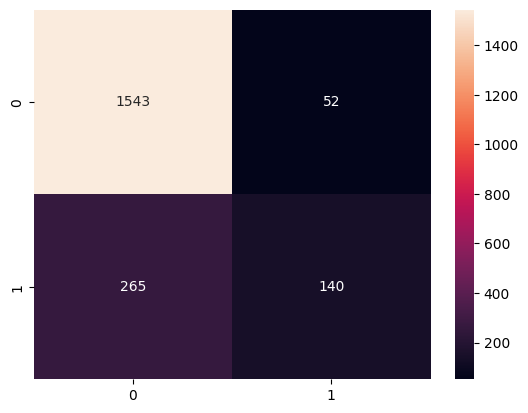

In [ ]:
import seaborn as sns
from sklearn import metrics
#predicting the Test set results
# Determine if the value is less than or more than the cut-off value
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)
print("Accuracy", metrics.accuracy_score(Y_test, Y_pred))
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt='');

In [ ]:
# Accuracy is based on diagonal elemens
(1543+140)/2000

0.8415

Predicting the class of a new customer who is visitng the bank for the first time!

In [ ]:
# New customer
#Geography: France (0,0)
#Credit Score: 600
#Gender :Male (1)
#Age: 40 years old
#Tenure: 3 Years
#Balance  : $60000
#Number of products: 2
# Does this customer have a cret card? Yes(1)
# Is this customer  an Active member: Yes(1)
# Estimated salary: $50000
#predict the class of this customer

#The brackets for a numpy array in python is ([])
# so why are using ([[]]) this?
# We need to transpose the data from horizontal to vertical
# In alignment with the input nodes
# This raw data has to be scaled before it can be fitted into the model
# apply sc.transform
new_customer = classifier.predict(sc.transform(np.array([[0,0,600,1,40,3,60000,2,1,1,50000]])))
#you will get a probability value for the new_customer
# Then you compare with the cut-off
print("Probability of the new customer", new_customer)
new_prediction = (new_customer>0.5)
new_prediction

1/1 [==============================] - 0s 44ms/step
Probability of the new customer [[0.07834631]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[False]])